In [1]:
from pylab import *
%matplotlib inline
import pandas as pd
xkcd()

In [2]:
goodteams = ['TBL', 'BOS', 'WPG', 'VGK', 'WSH', 'STL', 'NSH', 'DAL']
okayteams = ['PIT', 'CBJ', 'CHI', 'MIN', 'SEA', 'ANA', 'SJS', 'LAK', 'TOR', 'CGY']
badteams = ['ARI', 'BUF', 'MTL', 'FLA', 'PHI', 'CAR', 'OTT', 'NYR', 'NYI', 'NJD', 'EDM', 'COL', 'VAN', 'DET']

In [3]:
teams = []
strengths = []
components = []
u = [0.1, 0, -0.2]
s = [0.15, 0.2, 0.1]
np.random.seed(5)
for i, lst in enumerate((goodteams, okayteams, badteams)):
    for comp in ['ES', 'PP', 'PK', 'G', 'Coach']:
        teams += lst
        strengths += list(np.random.normal(loc=u[i]/5, scale=s[i], size=len(lst)))
        components += [comp] * len(lst)
df = pd.DataFrame({'Team': teams, 'Strength': strengths, 'Component': components}) \
    .sort_values('Strength')
df.loc[:, 'Cumulative'] = df.groupby('Team')['Strength'].cumsum() - df.Strength

totals = df[['Team', 'Strength']].groupby('Team', as_index=False).sum().rename(columns={'Strength': 'Total'})
totals = totals.sort_values('Total', ascending=False)

totals.loc[:, 'Row'] = 1
totals.loc[:, 'Row'] = totals.Row.cumsum()
totals.loc[:, 'Row'] = totals.Row.max() - totals.Row

df = df.merge(totals[['Team', 'Row']], how='left', on='Team')
#df.head()
totals.head()

,Team,Total,Row
5,CBJ,0.520275,31
26,TBL,0.515570,30
25,STL,0.483703,29
24,SJS,0.476686,28
13,LAK,0.452730,27


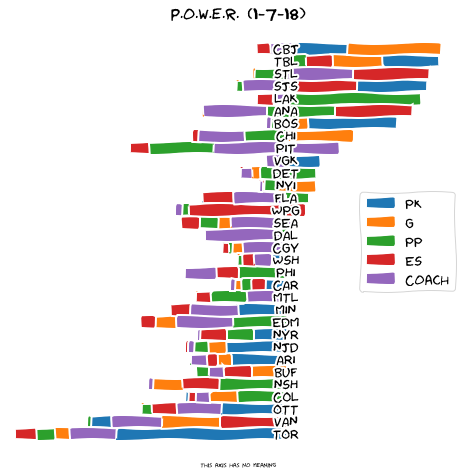

In [4]:
f = figure(figsize=[8, 8])
for comp in df.Component.unique():
    tmp = df[df.Component == comp]
    barh(tmp.Row.values, tmp.Strength.values, left=tmp.Cumulative.values, label=comp);
xticks([])
xlabel('This axis has no meaning', size=6)
yticks([])
for i, t, s, r in totals.itertuples():
    annotate(t, xy=(0, r), ha='center', va='center')
title('p.o.w.e.r. (1-7-18)')
for side in ['top', 'right', 'left', 'bottom']:
    gca().spines[side].set_visible(False)
legend(loc='right')